In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [197]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [198]:
from backend.settings import CONTINUOUS_FEATURES, CATEGORICAL_FEATURES, PATH
from backend.utils import get_normalization_layer, dataframe_to_dataset, get_category_encoding_layer

In [199]:
df = pd.read_csv(PATH, skipinitialspace=True, decimal=',', index_col=False)

In [200]:
df

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,52372,M,38,MAR,SPC,12168.0,10,1.1,0.308454,GRD,ОБЛ ВОЛОГОДСКАЯ,25000.0,0.0,0.0,0
1,75213,F,36,MAR,SPC,17738.0,10,1.1,0.498147,GRD,ОБЛ БЕЛГОРОДСКАЯ,25000.0,4.0,0.0,0
2,119931,M,23,UNM,SPC,26489.0,10,1.1,0.431980,SCH,ЧЕЛЯБИНСКАЯ ОБЛ,25000.0,NaN,NaN,0
3,134365,M,24,UNM,SPC,20379.0,12,1.6,0.770546,GRD,РЕСП КАРАЧАЕВО-ЧЕРКЕССКАЯ,50000.0,NaN,NaN,1
4,138695,F,47,MAR,SPC,12019.0,10,1.6,0.617275,SCH,УЛЬЯНОВСКАЯ ОБЛ,18000.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136591,167442,F,55,MAR,WRP,34732.0,6,1.1,0.328384,UGR,АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - Ю,35000.0,4.0,0.0,0
136592,134582,M,30,UNM,SPC,22990.0,7,1.6,0.278594,SCH,ОБЛ МОСКОВСКАЯ,30000.0,1.0,0.0,0
136593,170180,F,36,DIV,SPC,18929.0,10,1.1,0.425852,GRD,ОМСКАЯ ОБЛАСТЬ,25000.0,0.0,0.0,0
136594,59295,F,32,MAR,UMN,15112.8,10,1.2,0.419264,GRD,САНКТ-ПЕТЕРБУРГ,50000.0,5.0,0.0,0


In [201]:
df.drop("client_id", axis=1)
df.drop_duplicates(inplace=True)
df.dropna(how='any', axis=0, inplace=True)
df[['overdue_credit_count', 'monthly_income', 'credit_count']] = df[
    ['overdue_credit_count', 'monthly_income', 'credit_count']].astype(str).astype(float)

In [202]:
df.head

<bound method NDFrame.head of         client_id gender  age marital_status job_position  credit_sum  \
0           52372      M   38            MAR          SPC     12168.0   
1           75213      F   36            MAR          SPC     17738.0   
4          138695      F   47            MAR          SPC     12019.0   
5          100261      F   40            UNM          UMN     16990.0   
6           95437      M   30            MAR          SPC     40388.0   
...           ...    ...  ...            ...          ...         ...   
136591     167442      F   55            MAR          WRP     34732.0   
136592     134582      M   30            UNM          SPC     22990.0   
136593     170180      F   36            DIV          SPC     18929.0   
136594      59295      F   32            MAR          UMN     15112.8   
136595     167643      F   32            DIV          SPC     33163.9   

        credit_month tariff_id  score_shk education  \
0                 10       1.1   0.308

In [203]:
df.dtypes

client_id                 int64
gender                   object
age                       int64
marital_status           object
job_position             object
credit_sum              float64
credit_month              int64
tariff_id                object
score_shk               float64
education                object
living_region            object
monthly_income          float64
credit_count            float64
overdue_credit_count    float64
open_account_flg          int64
dtype: object

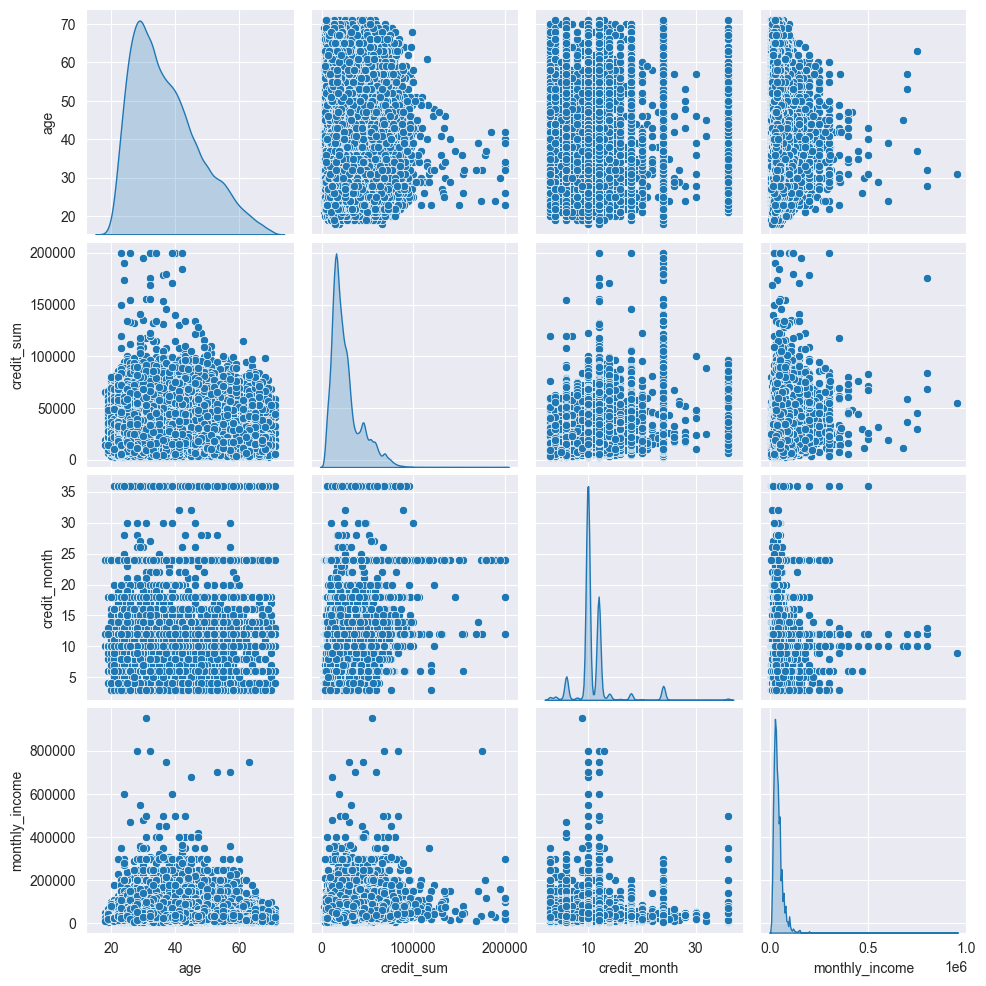

In [204]:
sns.pairplot(df[[ 'age', 'credit_sum', 'credit_month', 'monthly_income']], diag_kind='kde')

Text(0, 0.5, 'overdue_credit_count')

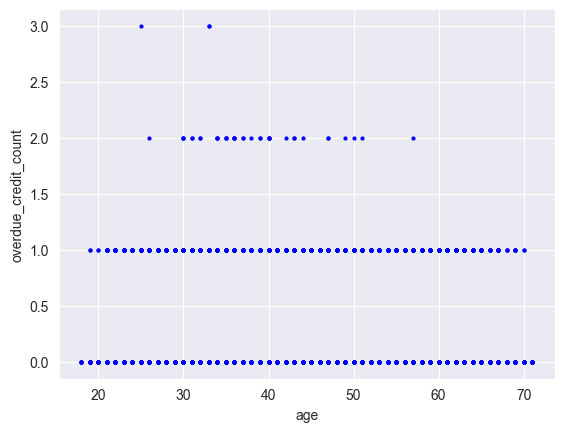

In [205]:
plt.plot(df['age'], df['overdue_credit_count'], 'o', markersize=2, color='blue')
plt.xlabel('age')
plt.ylabel('overdue_credit_count')

In [206]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
client_id,129089.0,85357.561024,49292.688624,1.0,42678.000000,85318.000000,128044.000000,170745.000000
age,129089.0,37.063243,10.407600,18.0,29.000000,35.000000,43.000000,71.000000
credit_sum,129089.0,25941.566415,16195.125740,2736.0,14832.000000,21089.000000,31778.000000,200000.000000
credit_month,129089.0,10.988636,3.541294,3.0,10.000000,10.000000,12.000000,36.000000
score_shk,129089.0,0.465058,0.121805,0.0,0.377064,0.457606,0.546316,0.976126
monthly_income,129089.0,40417.315062,25325.999992,5000.0,25000.000000,35000.000000,50000.000000,950000.000000
credit_count,129089.0,2.106764,1.778071,0.0,1.000000,2.000000,3.000000,21.000000
overdue_credit_count,129089.0,0.046371,0.211976,0.0,0.000000,0.000000,0.000000,3.000000
open_account_flg,129089.0,0.164909,0.371100,0.0,0.000000,0.000000,0.000000,1.000000


In [207]:
df.describe().transpose()[['mean', 'std']]

,mean,std
client_id,85357.561024,49292.688624
age,37.063243,10.407600
credit_sum,25941.566415,16195.125740
credit_month,10.988636,3.541294
score_shk,0.465058,0.121805
monthly_income,40417.315062,25325.999992
credit_count,2.106764,1.778071
overdue_credit_count,0.046371,0.211976
open_account_flg,0.164909,0.371100


In [208]:
df_train, df_val, df_test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

In [209]:
batch_size = 256
val_ds = dataframe_to_dataset(df_val, batch_size=batch_size)
test_ds = dataframe_to_dataset(df_test, batch_size=batch_size)
train_ds = dataframe_to_dataset(df_train, batch_size=batch_size)

C:\Users\khudo\PycharmProjects\alif-test\backend\utils.py:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:, tf.newaxis] for key, value in dataframe.items()}
C:\Users\khudo\PycharmProjects\alif-test\backend\utils.py:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:, tf.newaxis] for key, value in dataframe.items()}
C:\Users\khudo\PycharmProjects\alif-test\backend\utils.py:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:, tf.newaxis] for key, value in dataframe.items()}


In [210]:
df.dtypes

client_id                 int64
gender                   object
age                       int64
marital_status           object
job_position             object
credit_sum              float64
credit_month              int64
tariff_id                object
score_shk               float64
education                object
living_region            object
monthly_income          float64
credit_count            float64
overdue_credit_count    float64
open_account_flg          int64
dtype: object

In [211]:
all_inputs = []
encoded_features = []

for column in CONTINUOUS_FEATURES:
    numeric_col = tf.keras.Input(shape=(1,), name=column)
    normalization_layer = get_normalization_layer(column, train_ds)
    encoded_numeric_col = normalization_layer(numeric_col)
    all_inputs.append(numeric_col)
    encoded_features.append(encoded_numeric_col)


In [212]:
for column in CATEGORICAL_FEATURES:
    categorical_col = tf.keras.Input(shape=(1,), name=column, dtype='string')
    encoding_layer = get_category_encoding_layer(name=column,
                                                 dataset=train_ds,
                                                 dtype='string',
                                                 max_tokens=5)
    encoded_categorical_col = encoding_layer(categorical_col)
    all_inputs.append(categorical_col)
    encoded_features.append(encoded_categorical_col)

### Model version #1

In [213]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(32, activation='relu')(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)

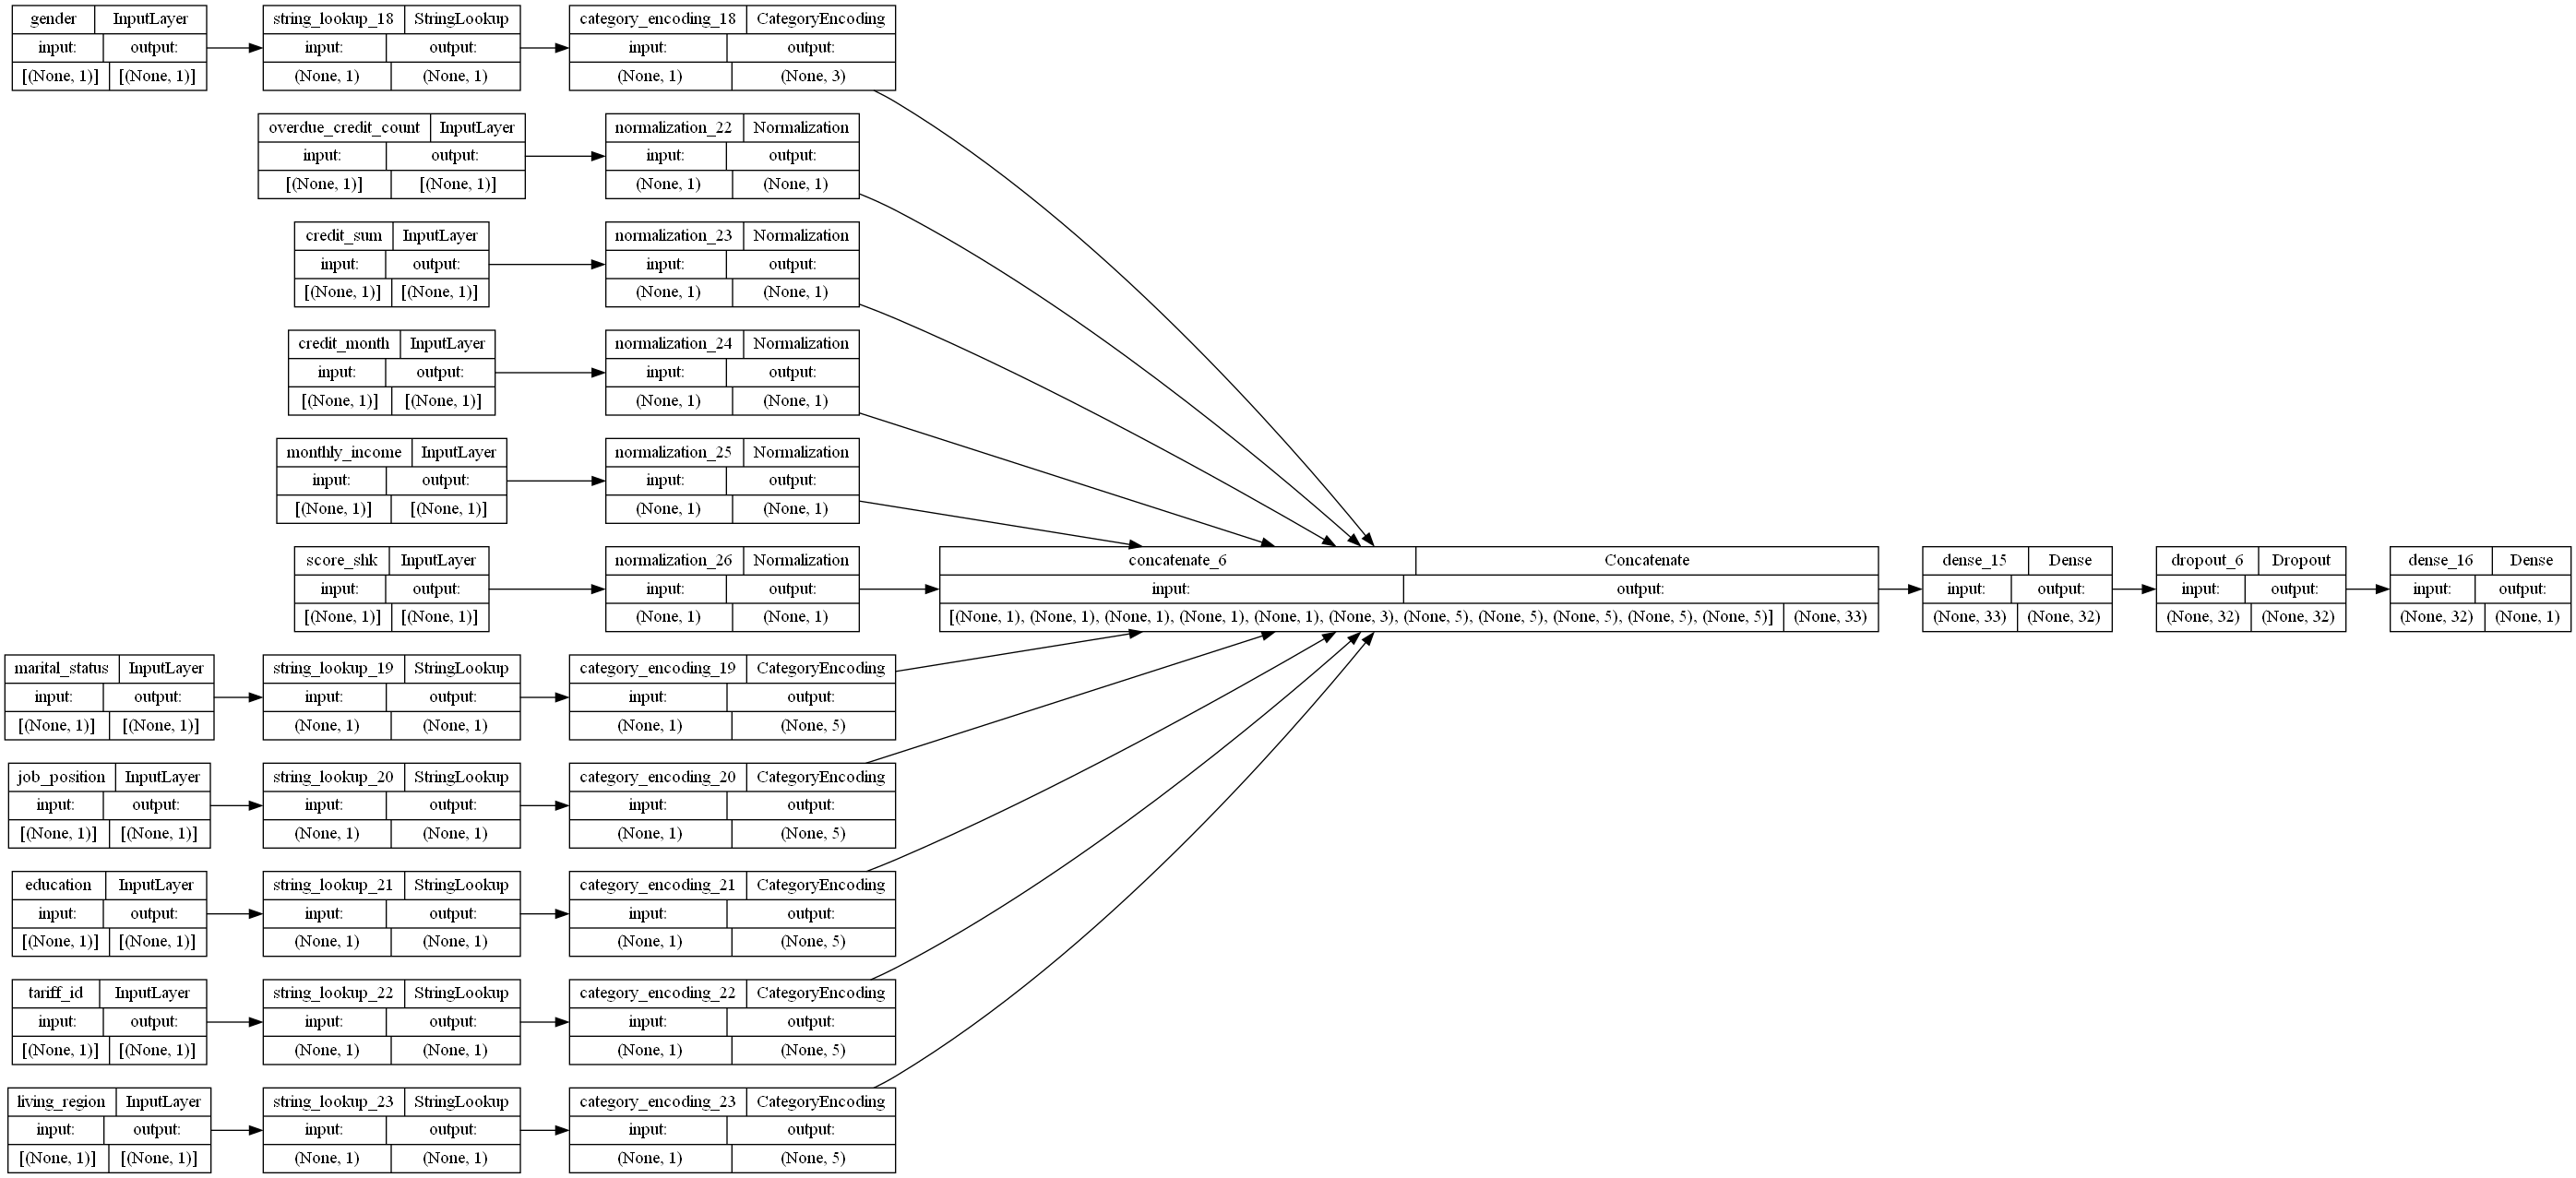

In [214]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [215]:
model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


C:\Users\khudo\PycharmProjects\alif-test\venv\lib\site-packages\keras\engine\functional.py:638: UserWarning: Input dict contained keys ['client_id', 'age', 'credit_count', 'open_account_flg'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


404/404 [==============================] - 3s 4ms/step - loss: 0.4876 - accuracy: 0.8223 - val_loss: 0.4171 - val_accuracy: 0.8359
Epoch 2/10
404/404 [==============================] - 2s 3ms/step - loss: 0.4339 - accuracy: 0.8345 - val_loss: 0.4127 - val_accuracy: 0.8359
Epoch 3/10
404/404 [==============================] - 2s 3ms/step - loss: 0.4286 - accuracy: 0.8346 - val_loss: 0.4108 - val_accuracy: 0.8359
Epoch 4/10
404/404 [==============================] - 2s 3ms/step - loss: 0.4240 - accuracy: 0.8347 - val_loss: 0.4088 - val_accuracy: 0.8359
Epoch 5/10
404/404 [==============================] - 2s 3ms/step - loss: 0.4210 - accuracy: 0.8348 - val_loss: 0.4075 - val_accuracy: 0.8359
Epoch 6/10
404/404 [==============================] - 2s 3ms/step - loss: 0.4187 - accuracy: 0.8349 - val_loss: 0.4067 - val_accuracy: 0.8360
Epoch 7/10
404/404 [==============================] - 2s 3ms/step - loss: 0.4168 - accuracy: 0.8347 - val_loss: 0.4063 - val_accuracy: 0.8361
Epoch 8/10
404/40

In [216]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

51/51 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8382
Accuracy 0.8381749391555786


### Model version #2

In [217]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(32, activation='sigmoid')(all_features)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)

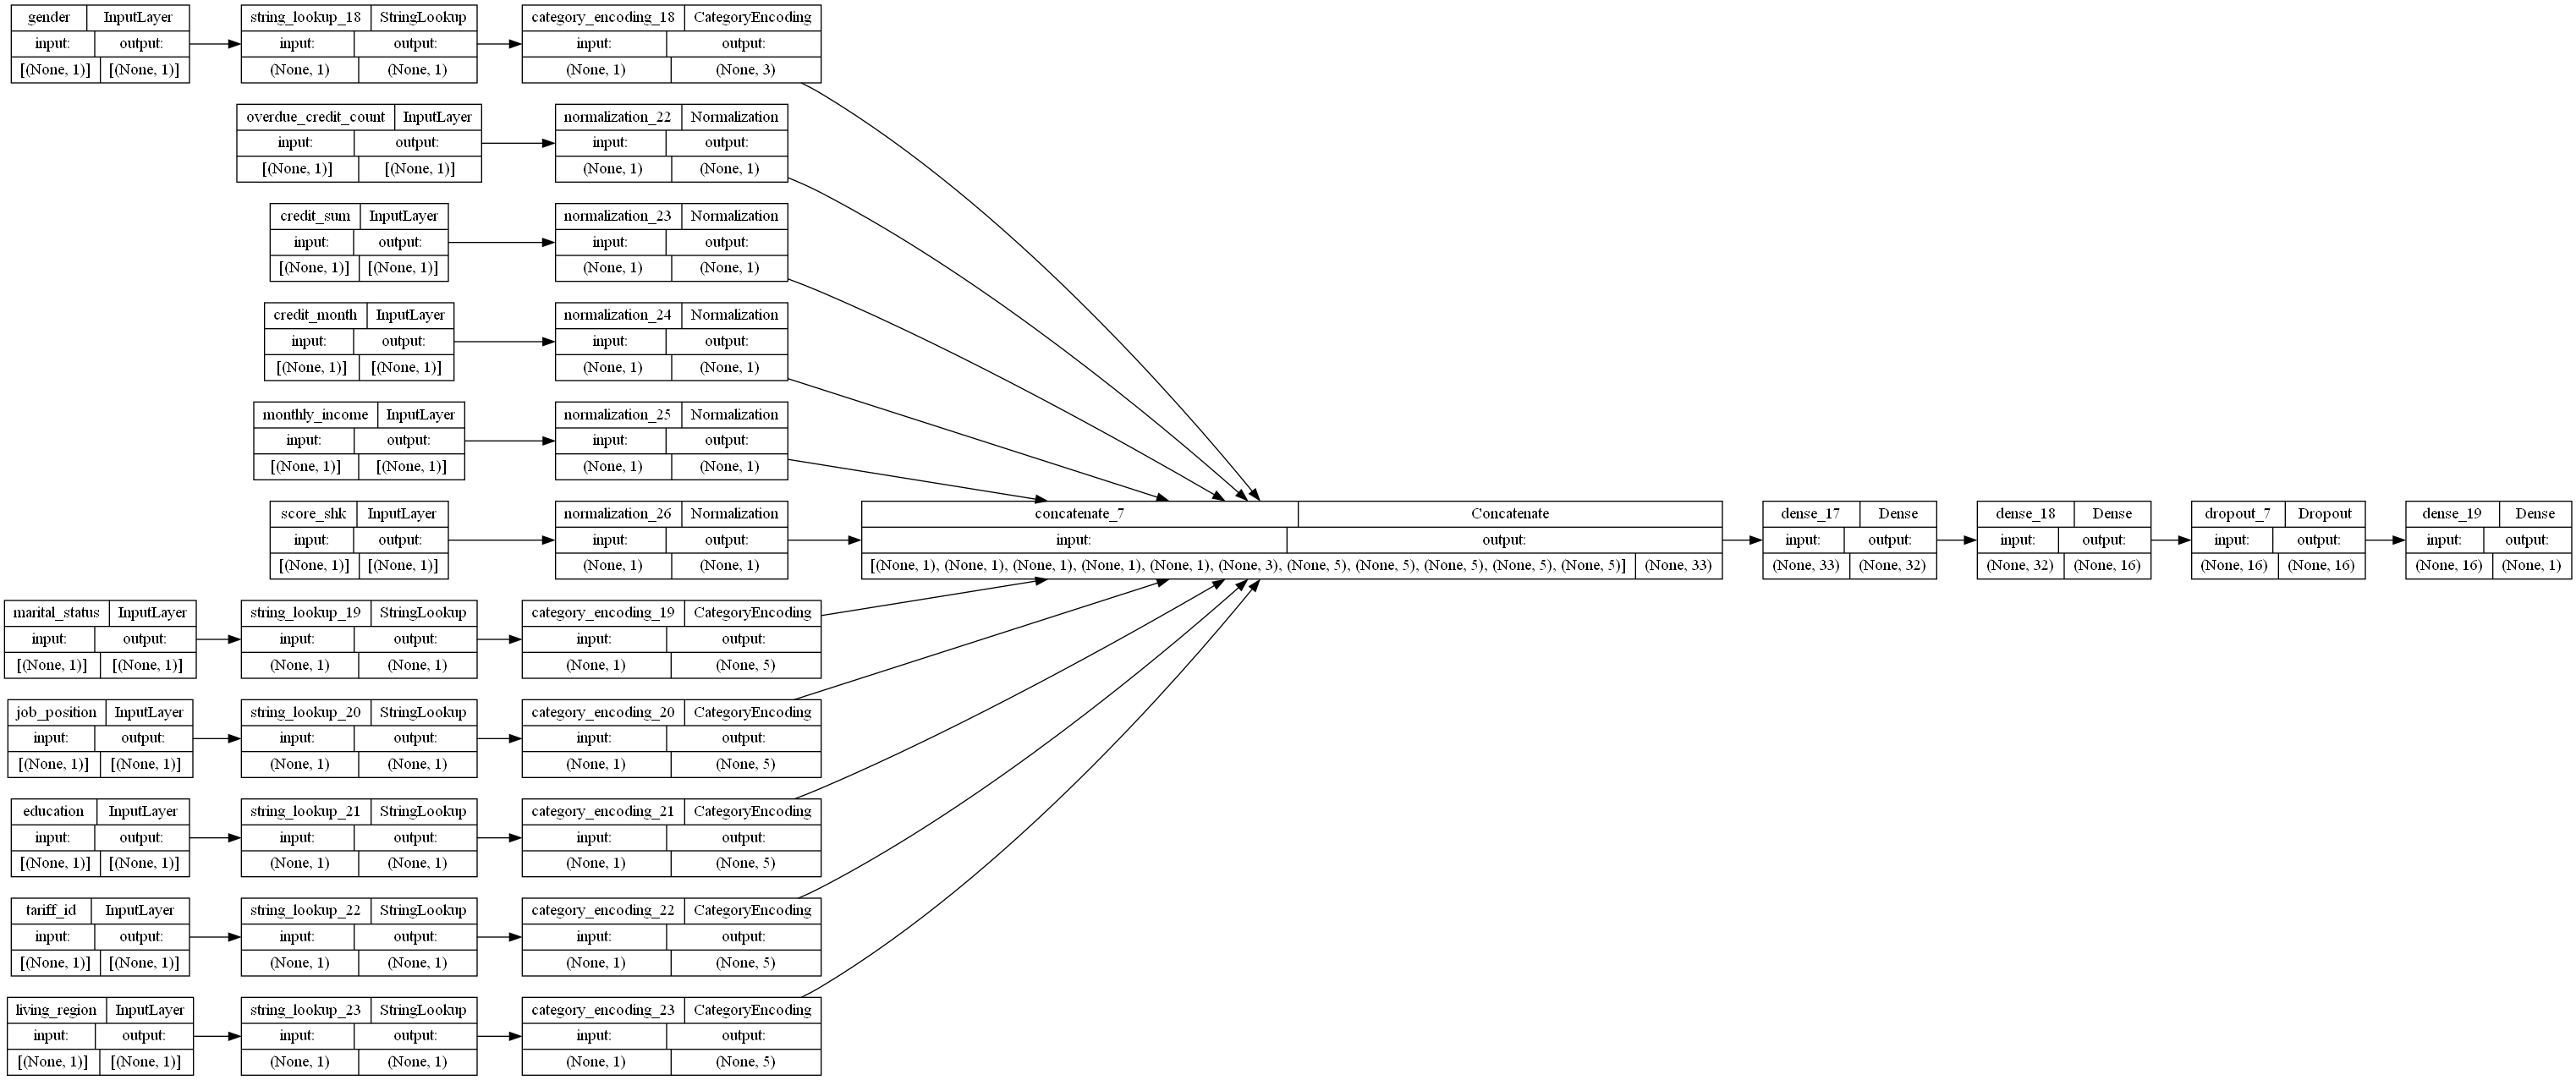

In [218]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [219]:
model.fit(train_ds, epochs=2, validation_data=val_ds)

Epoch 1/2
404/404 [==============================] - 3s 4ms/step - loss: 0.4752 - accuracy: 0.8328 - val_loss: 0.4242 - val_accuracy: 0.8359
Epoch 2/2
404/404 [==============================] - 2s 3ms/step - loss: 0.4427 - accuracy: 0.8346 - val_loss: 0.4161 - val_accuracy: 0.8359


In [220]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

51/51 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8380
Accuracy 0.8380199670791626


### Saving and loading model

In [221]:
model.save('scoring_model')
reloaded_model = tf.keras.models.load_model('scoring_model')

INFO:tensorflow:Assets written to: scoring_model\assets


INFO:tensorflow:Assets written to: scoring_model\assets
